<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Erick David Mendoza Gómez, César Sainz Nava.

**Fecha:** 05 de marzo del 2020.

**Expediente** : if713923 - if714982.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6 en parejas

In [14]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

## Ejercicio 1

### Ejemplo binomial: 
La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.

Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que
$$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> ## <font color ='red'>Tarea: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1},\quad i=0,1,\cdots,n$$

>Sustituyendo $P_i$ en $P_{i+1}$

>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p}*[\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}]$$

>Simplificando

>$$p_{i+1}=\frac{n!}{{i+1}!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$



## Ejercicio 2

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$

$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(1+k)k!}$$

Es posible ver que ahi se encuentra $P(k, \lambda)$, entonces
$$P(k + 1)=\frac{\lambda}{(1+k)} P(k,\lambda) $$

In [12]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

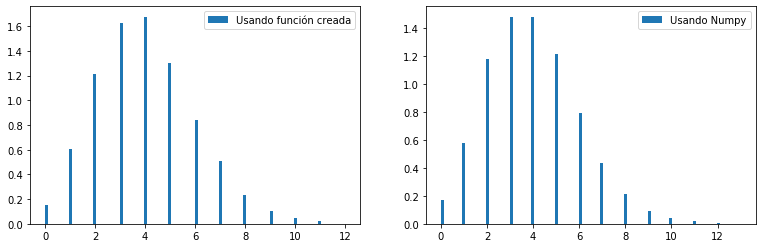

In [13]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()



## Ejercicio 3

Tenemos las 2 funciones con las que vamos a trabajar: $$f(x)=30(x^2-2x^3+x^4)$$  $$t(x) = a sin(\pi x)$$

Ahora hay que calcular $$x = g(x)$$  $$G(x) = \dfrac{\pi}{2}  \int \limits_{0}^{1}{\sin(\pi x)} dx $$  $$ U = \dfrac{-\cos(\pi x)}{2}+ \dfrac {1}{2}$$  Despejamos x que sería nuestra g(x):  $$ R2 = x = \dfrac{\cos^{-1}(-2U+1)}{\pi}$$